<a href="https://colab.research.google.com/github/9zxu/Analysis_Obesity/blob/main/ObesityDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 取得資料資訊、檢查缺失值、LabelEncoder、相關係數熱圖

載入套件

In [ ]:
import pandas as pd
import numpy as np
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#np.random.seed()

載入資料

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive') # 此處需要登入google帳號
#df = pd.read_csv("/content/drive/MyDrive/obesity/ObesityDataSet.csv",encoding="big5" ) #讀取繁體中文字使用big5內碼
df = pd.read_csv("ObesityDataSet.csv",encoding = "big5" )
df

,Gender,Age,Tall,Weight,家族過重史,頻繁地攝取高熱量食物,蔬菜攝取頻率,主餐次數,兩餐之間的食物攝取量,是否抽菸,每日水攝取量,熱量控制,身體活動頻率,使用電子設備的時間,多常喝酒,使用的交通工具,體重等級,Unnamed: 17
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,NaN
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,NaN
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,NaN
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,NaN
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,NaN
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,NaN
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,NaN
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,NaN


## 取得資料資訊

In [ ]:
df.shape #(rows,columns)

(2111, 18)

In [ ]:
df.describe()

,Age,Tall,Weight,蔬菜攝取頻率,主餐次數,每日水攝取量,身體活動頻率,使用電子設備的時間,Unnamed: 17
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,0.0
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,NaN
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,NaN
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,NaN
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,NaN
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,NaN
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,NaN
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,NaN


## 檢查缺失值

[Pandas DataFrame info() Option](https://www.w3schools.com/python/pandas/ref_df_info.asp)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       2111 non-null   object 
 1   Age          2111 non-null   float64
 2   Tall         2111 non-null   float64
 3   Weight       2111 non-null   float64
 4   家族過重史        2111 non-null   object 
 5   頻繁地攝取高熱量食物   2111 non-null   object 
 6   蔬菜攝取頻率       2111 non-null   float64
 7   主餐次數         2111 non-null   float64
 8   兩餐之間的食物攝取量   2111 non-null   object 
 9   是否抽菸         2111 non-null   object 
 10  每日水攝取量       2111 non-null   float64
 11  熱量控制         2111 non-null   object 
 12  身體活動頻率       2111 non-null   float64
 13  使用電子設備的時間    2111 non-null   float64
 14  多常喝酒         2111 non-null   object 
 15  使用的交通工具      2111 non-null   object 
 16  體重等級         2111 non-null   object 
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(9), object(9)
memory usage: 297.0+ KB

In [ ]:
df.isnull().sum()

Gender            0
Age               0
Tall              0
Weight            0
家族過重史             0
頻繁地攝取高熱量食物        0
蔬菜攝取頻率            0
主餐次數              0
兩餐之間的食物攝取量        0
是否抽菸              0
每日水攝取量            0
熱量控制              0
身體活動頻率            0
使用電子設備的時間         0
多常喝酒              0
使用的交通工具           0
體重等級              0
Unnamed: 17    2111
dtype: int64

### 統計非數值欄位中各群組資料個數
[Pandas value_counts & Pandas groupby & Pandas aggregate](https://www.learncodewithmike.com/2021/04/pandas-groupby-and-aggregate-method.html)

In [ ]:
df.value_counts('Gender')

Gender
Male      1068
Female    1043
dtype: int64

In [ ]:
df.value_counts('家族過重史')

家族過重史
yes    1726
no      385
dtype: int64

In [ ]:
df.value_counts('頻繁地攝取高熱量食物')

頻繁地攝取高熱量食物
yes    1866
no      245
dtype: int64

In [ ]:
df.value_counts('兩餐之間的食物攝取量')

兩餐之間的食物攝取量
Sometimes     1765
Frequently     242
Always          53
no              51
dtype: int64

In [ ]:
df.value_counts('是否抽菸')

是否抽菸
no     2067
yes      44
dtype: int64

In [ ]:
df.value_counts('熱量控制')

熱量控制
no     2015
yes      96
dtype: int64

In [ ]:
df.value_counts('多常喝酒')

多常喝酒
Sometimes     1401
no             639
Frequently      70
Always           1
dtype: int64

In [ ]:
df.value_counts('使用的交通工具')

使用的交通工具
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
dtype: int64

In [ ]:
df.value_counts('體重等級')

體重等級
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
dtype: int64

## LabelEncoder
>將類別 (categorical)或是文字(text)的資料轉換成數字，而讓程式能夠更好的去理解及運算。

 [資料前處理 : Label encoding & One hot encoding](https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87)

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_le=df
labelencoder = LabelEncoder() 

In [ ]:
df_le['Gender']=labelencoder.fit_transform(df_le['Gender']) #fit擬合(計算出係數) #transform轉換(資料數值)
df_le['F_H']=labelencoder.fit_transform(df_le['家族過重史'])
df_le['H-cal_f']=labelencoder.fit_transform(df_le['頻繁地攝取高熱量食物'])
df_le['Two_meal_con']=labelencoder.fit_transform(df_le['兩餐之間的食物攝取量'])
df_le['Smoke']=labelencoder.fit_transform(df_le['是否抽菸'])
df_le['Cal_mo']=labelencoder.fit_transform(df_le['熱量控制'])
df_le['alcohol']=labelencoder.fit_transform(df_le['多常喝酒'])
df_le['transport']=labelencoder.fit_transform(df_le['使用的交通工具'] )
df_le['W_Lv']=labelencoder.fit_transform(df_le['體重等級'])

將欄名稱改成英文（不易亂碼）

In [ ]:
df['Water']=df['每日水攝取量']
df['FAF']=df['身體活動頻率']
df['Tech_time']=df['使用電子設備的時間']
df['Meal_times']=df['主餐次數']
df['Veg']=df['蔬菜攝取頻率']

刪除原中文欄位

[python pandas中 inplace 参数理解
](https://blog.csdn.net/songyunli1111/article/details/82937954)

In [ ]:
df.drop(columns=["家族過重史","頻繁地攝取高熱量食物","蔬菜攝取頻率","主餐次數","兩餐之間的食物攝取量","是否抽菸","每日水攝取量","熱量控制","身體活動頻率","使用電子設備的時間","多常喝酒","使用的交通工具","體重等級","Unnamed: 17"], inplace = True)

In [ ]:
df_le

,Gender,Age,Tall,Weight,F_H,H-cal_f,Two_meal_con,Smoke,Cal_mo,alcohol,transport,W_Lv,Water,FAF,Tech_time,Meal_times,Veg
0,0,21.000000,1.620000,64.000000,1,0,2,0,0,3,3,1,2.000000,0.000000,1.000000,3.0,2.0
1,0,21.000000,1.520000,56.000000,1,0,2,1,1,2,3,1,3.000000,3.000000,0.000000,3.0,3.0
2,1,23.000000,1.800000,77.000000,1,0,2,0,0,1,3,1,2.000000,2.000000,1.000000,3.0,2.0
3,1,27.000000,1.800000,87.000000,0,0,2,0,0,1,4,5,2.000000,2.000000,0.000000,3.0,3.0
4,1,22.000000,1.780000,89.800000,0,0,2,0,0,2,3,6,2.000000,0.000000,0.000000,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,2,0,0,2,3,4,1.728139,1.676269,0.906247,3.0,3.0
2107,0,21.982942,1.748584,133.742943,1,1,2,0,0,2,3,4,2.005130,1.341390,0.599270,3.0,3.0
2108,0,22.524036,1.752206,133.689352,1,1,2,0,0,2,3,4,2.054193,1.414209,0.646288,3.0,3.0
2109,0,24.361936,1.739450,133.346641,1,1,2,0,0,2,3,4,2.852339,1.139107,0.586035,3.0,3.0


## 相關係數熱圖
[plt.figure()參數](https://vimsky.com/zh-tw/examples/usage/matplotlib-pyplot-figure-in-python.html)

[seaborn.heatmap()參數](https://blog.csdn.net/ztf312/article/details/102474190)

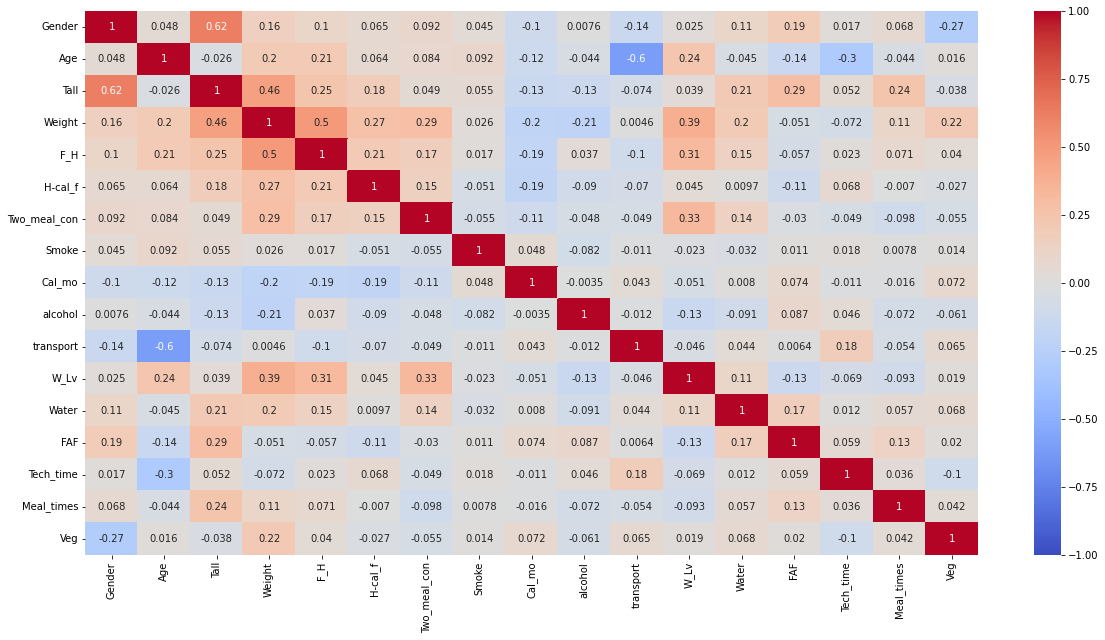

In [ ]:
plt.figure(figsize=(20,10)) #圖的大小（寬,高）
c=df_le.corr()
sns.heatmap(c,vmin = -1, vmax = +1, annot=True, cmap='coolwarm') 
# vmin最小值, vmax最大值, annot 使否顯示數值, mask遮罩, cmap顏色 

由於圖形對稱，遮罩上三角

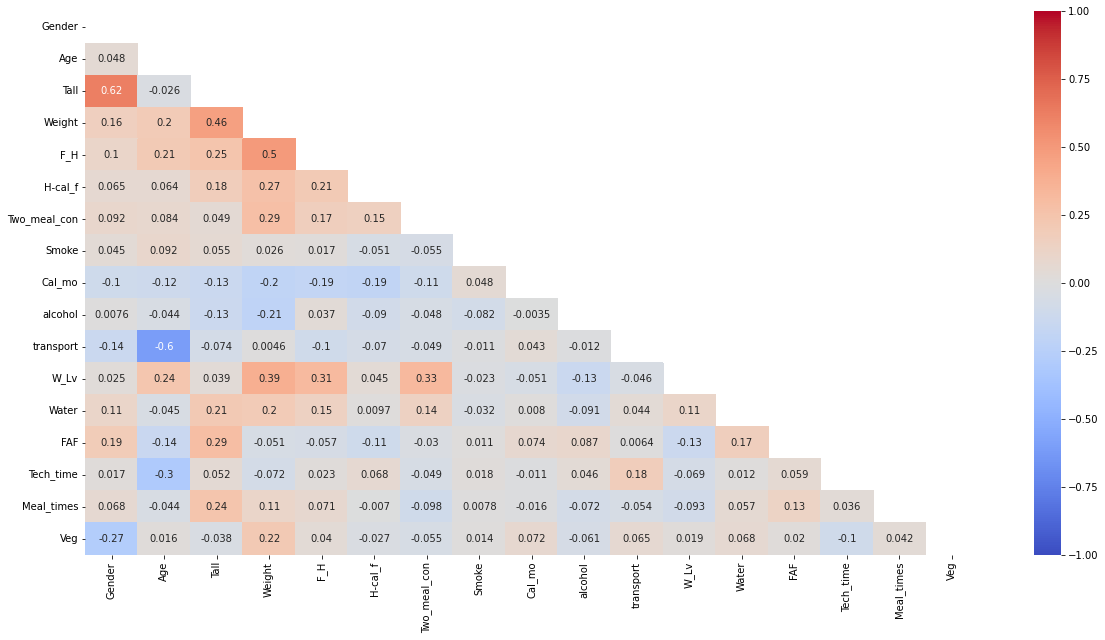

In [ ]:
plt.figure(figsize=(20,10)) #圖的大小（寬,高）
c=df_le.corr()
sns.heatmap(c,vmin = -1, vmax = +1, mask=np.triu(c),annot=True, cmap='coolwarm') 

取得各個特徵與體重等級(label)的相關性

# 重新存檔！

[pandas的to_csv()使用方法
](https://www.itread01.com/content/1546844979.html)

In [ ]:
df_le.corr()["W_Lv"]

Gender          0.024908
Age             0.236170
Tall            0.038986
Weight          0.387643
F_H             0.313667
H-cal_f         0.044582
Two_meal_con    0.327295
Smoke          -0.023256
Cal_mo         -0.050679
alcohol        -0.134632
transport      -0.046202
W_Lv            1.000000
Water           0.108868
FAF            -0.129564
Tech_time      -0.069448
Meal_times     -0.092616
Veg             0.018522
Name: W_Lv, dtype: float64

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
#df.to_csv("/content/drive/MyDrive/obesity/Obesity_analysis.csv",encoding = "utf8")
df.to_csv("Obesity_analysis.csv",encoding = "utf8")

# 資料標準化、切分、訓練、分析

載入資料

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


> [How to get rid of "Unnamed: 0" column in a pandas DataFrame read in from CSV file?](https://stackoverflow.com/questions/36519086/how-to-get-rid-of-unnamed-0-column-in-a-pandas-dataframe-read-in-from-csv-fil)
↓↓
by addind : index_col=[0]

In [ ]:
#df_le = pd.read_csv("/content/drive/MyDrive/obesity/Obesity_analysis.csv",encoding="utf8", index_col=[0] )
df_le = pd.read_csv("Obesity_analysis.csv",encoding = "utf8",index_col=[0])
df_le.head()

,Gender,Age,Tall,Weight,F_H,H-cal_f,Two_meal_con,Smoke,Cal_mo,alcohol,transport,W_Lv,Water,FAF,Tech_time,Meal_times,Veg
0,0,21.0,1.62,64.0,1,0,2,0,0,3,3,1,2.0,0.0,1.0,3.0,2.0
1,0,21.0,1.52,56.0,1,0,2,1,1,2,3,1,3.0,3.0,0.0,3.0,3.0
2,1,23.0,1.80,77.0,1,0,2,0,0,1,3,1,2.0,2.0,1.0,3.0,2.0
3,1,27.0,1.80,87.0,0,0,2,0,0,1,4,5,2.0,2.0,0.0,3.0,3.0
4,1,22.0,1.78,89.8,0,0,2,0,0,2,3,6,2.0,0.0,0.0,1.0,2.0


In [ ]:
x = df_le.drop(columns = ["W_Lv"])
y =df_le.W_Lv

## 標準化

preprocessing.scale(X)直接標準化數據X。

In [ ]:
from sklearn import preprocessing
x=preprocessing.scale(x)
# scaled之後的資料零均值，單位方差  
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,0.300346,-0.145900,-0.218272,1.419172,0.503337,-0.013073,-1.188039,0.561997,0.404153,-0.785019
1,-1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,0.300346,6.853997,4.581439,-0.521160,0.503337,1.618759,2.339750,-1.080625,0.404153,1.088342
2,0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,0.300346,-0.145900,-0.218272,-2.461491,0.503337,-0.013073,1.163820,0.561997,0.404153,-0.785019
3,0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,0.300346,-0.145900,-0.218272,-2.461491,1.296280,-0.013073,1.163820,-1.080625,0.404153,1.088342
4,0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,0.300346,-0.145900,-0.218272,-0.521160,0.503337,-0.013073,-1.188039,-1.080625,-2.167023,-0.785019


## 切分訓練集與測試集



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) #, random_state = 48

## 模型訓練

### SVC(Support Vector Classifier)

4種Kernal準確率比較

In [ ]:
from sklearn.svm import SVC
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train, y_train)
    svc_scores.append(svc_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

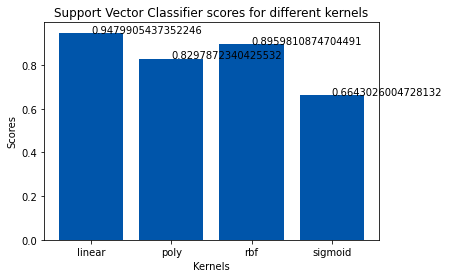

In [ ]:
colors = np.linspace(0, 1, len(kernels))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [ ]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 94.79905437352247% with linear kernel.


由上圖可知kernel=linear時準確率最高

In [ ]:
clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

SVC(kernel='linear')

訓練結果

In [ ]:
clf.score(x_test,y_test)

0.9479905437352246

In [ ]:
y_hat_train = clf.predict(x_train)
y_hat_test = clf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Performance on Training Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_train, y_hat_train))
print('  + coefficient of determination: %.2f' % r2_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_test, y_hat_test))
print('  + coefficient of determination: %.2f' % r2_score(y_test, y_hat_test))

Performance on Training Data
  + mean squared error: 0.19
  + coefficient of determination: 0.95
Performance on Testing Data
  + mean squared error: 0.25
  + coefficient of determination: 0.94


### 線性回歸LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept = True, normalize = True) 
lm.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

result

In [ ]:
lm.score(x_test,y_test)

0.29049406743202755

In [ ]:
y_hat_train = lm.predict(x_train)
y_hat_test = lm.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Performance on Training Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_train, y_hat_train))
print('  + coefficient of determination: %.2f' % r2_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_test, y_hat_test))
print('  + coefficient of determination: %.2f' % r2_score(y_test, y_hat_test))

Performance on Training Data
  + mean squared error: 2.68
  + coefficient of determination: 0.29
Performance on Testing Data
  + mean squared error: 2.74
  + coefficient of determination: 0.29


係數

In [ ]:
lm.coef_,

(array([-0.37198627,  0.04297115,  0.32252878, -0.32083565,  0.88937189,
         0.30829575, -0.13116966,  0.41688132, -0.09192587,  0.06681226,
        -0.14702698,  0.12183341,  0.06147864, -0.09657483,  0.0174443 ,
        -0.16911233, -0.05518624]),)

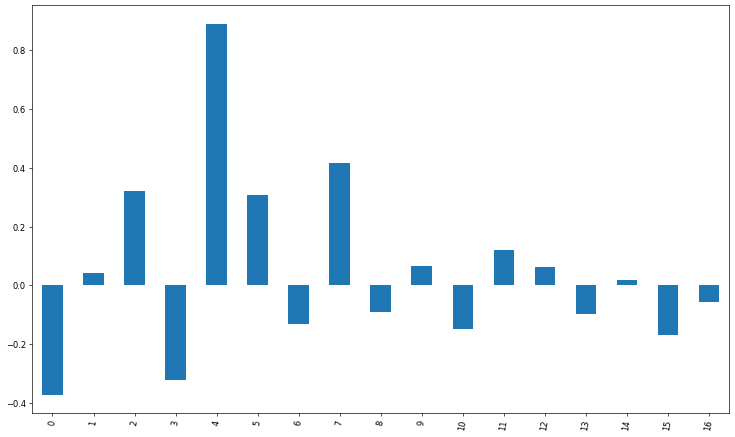

In [ ]:
plt.figure(figsize=(15,9), dpi = 60) 
ax = pd.Series(lm.coef_).plot.bar(rot = 80)

### Logistic回歸


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

result

In [ ]:
lr.score(x_test,y_test)

0.8912529550827423

In [ ]:
y_hat_train = lr.predict(x_train)
y_hat_test = lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Performance on Training Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_train, y_hat_train))
print('  + coefficient of determination: %.2f' % r2_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_test, y_hat_test))
print('  + coefficient of determination: %.2f' % r2_score(y_test, y_hat_test))

Performance on Training Data
  + mean squared error: 0.75
  + coefficient of determination: 0.80
Performance on Testing Data
  + mean squared error: 0.94
  + coefficient of determination: 0.76


預測

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([4, 6, 6, 2, 5, 2, 6, 3, 4, 0, 5, 4, 3, 3, 3, 4, 2, 0, 4, 4, 6, 6,
       1, 0, 6, 4, 1, 1, 6, 3, 6, 3, 2, 3, 4, 3, 3, 1, 1, 5, 0, 5, 1, 4,
       3, 0, 4, 3, 0, 0, 6, 6, 0, 4, 5, 6, 2, 1, 1, 5, 6, 6, 5, 4, 5, 1,
       0, 6, 2, 2, 4, 6, 5, 0, 0, 2, 0, 2, 0, 1, 3, 3, 0, 0, 6, 4, 4, 1,
       4, 1, 2, 5, 2, 0, 4, 2, 4, 1, 0, 5, 4, 0, 2, 5, 6, 5, 6, 6, 2, 3,
       1, 1, 3, 3, 4, 4, 6, 1, 2, 6, 1, 1, 4, 5, 1, 3, 4, 2, 4, 2, 1, 6,
       0, 1, 5, 4, 4, 3, 5, 0, 4, 2, 5, 6, 2, 3, 4, 2, 1, 2, 3, 3, 3, 6,
       1, 3, 1, 0, 1, 5, 4, 5, 5, 1, 3, 0, 0, 4, 2, 4, 4, 3, 5, 6, 5, 2,
       6, 6, 0, 1, 5, 6, 6, 3, 1, 2, 2, 4, 1, 1, 6, 1, 5, 2, 5, 4, 1, 6,
       1, 5, 1, 2, 1, 1, 3, 3, 1, 4, 1, 4, 1, 2, 5, 6, 2, 6, 5, 5, 2, 4,
       1, 6, 2, 4, 1, 4, 6, 5, 1, 4, 0, 5, 6, 3, 1, 4, 6, 0, 6, 0, 2, 5,
       2, 3, 2, 0, 3, 6, 4, 2, 0, 2, 2, 2, 1, 6, 1, 3, 3, 5, 5, 2, 5, 2,
       4, 0, 6, 4, 6, 0, 4, 3, 6, 0, 6, 2, 0, 3, 3, 2, 1, 1, 3, 3, 4, 2,
       0, 0, 0, 0, 6, 0, 1, 4, 3, 4, 5, 0, 3, 1, 1,

混淆矩陣

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

Text(0.5, 257.44, 'Predicted label')

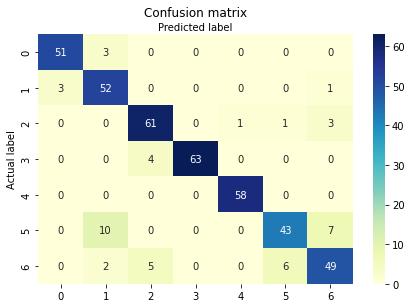

In [ ]:
class_names=[] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
error = 0
for i, v in enumerate(y_pred):
    if v!= y_test.values[i]:
        error+=1
print(error)

46


### K-means

In [ ]:
from sklearn.cluster import KMeans

kmeansModel = KMeans(n_clusters=3, random_state=46)
clusters_pred = kmeansModel.fit_predict(x)

In [ ]:
kmeansModel.score(x_test,y_test) #!準確率負數

-5570.181716215198

Inertia 計算所有點到每群集中心距離的平方和。

In [ ]:
kmeansModel.inertia_

28653.16344476919

群集中心

In [ ]:
kmeansModel.cluster_centers_

array([[-0.95456937, -0.28193549, -0.55943295, -0.53064251, -0.99470914,
        -0.8773399 , -0.5993545 , -0.51928507,  0.06869511,  0.41234694,
         0.13317112,  0.4130454 , -0.20046967,  0.10819686,  0.15111733,
        -0.12191013, -0.16710088],
       [-0.01386342,  0.3123171 ,  1.29879402,  0.18225582,  0.04004176,
         0.31155576,  0.16138519,  0.15802693,  0.0150169 , -0.15206912,
         0.0230253 , -1.82080705, -0.08424686, -0.02179332, -0.33954186,
         0.07742608, -0.12731837],
       [ 0.66590374,  0.05778796, -0.18341456,  0.28678995,  0.66998748,
         0.46967818,  0.34344629,  0.28957473, -0.05407518, -0.21827203,
        -0.10215764,  0.51373862,  0.17554905, -0.06522175,  0.04458662,
         0.05028062,  0.17139011]])

> 如何決定K??


當K值越來越大，inertia 會隨之越來越小。正常情況下不會取K最大的，一般是取 elbow point 附近作為 K，即 inertia 迅速下降轉為平緩的那個點。

In [ ]:
# k = 1~9 做9次kmeans, 並將每次結果的inertia收集在一個list裡
kmeans_list = [KMeans(n_clusters=k, random_state=46).fit(x)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_list]
inertias

[35887.0,
 31269.992726428336,
 28653.16344476919,
 26611.802558424137,
 24649.93722454318,
 23409.110507625857,
 21553.68461234455,
 20571.489793283385,
 19642.433531079238]

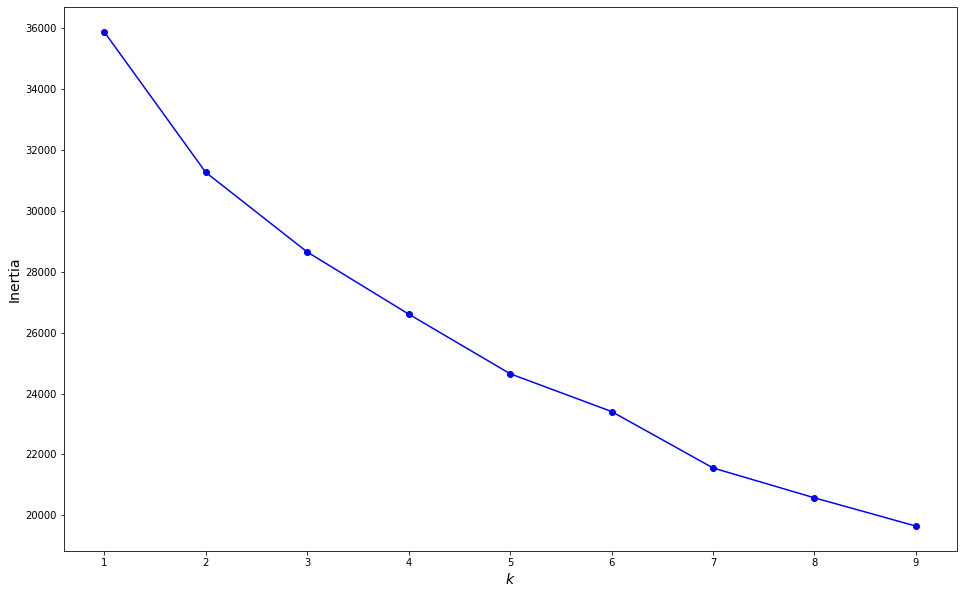

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

另外一個方法是用 silhouette scores 去評估，其分數越大代表分群效果越好。

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(x, model.labels_)
                     for model in kmeans_list[1:]]
silhouette_scores

[0.1810379580670198,
 0.13915238139975006,
 0.11449861476214102,
 0.13191775626091454,
 0.14679840072412298,
 0.15838518222776357,
 0.16816588157618612,
 0.1615381429371902]

### 隨機森林

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 建立RandomForestRegressor模型
randomForestModel = RandomForestRegressor(n_estimators=100, criterion = 'mse')
# 使用訓練資料訓練模型
randomForestModel.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse')

In [ ]:
predicted=randomForestModel.predict(x)
predicted

array([2.14, 0.98, 1.73, ..., 4.  , 4.  , 4.  ])

result

In [ ]:
randomForestModel.score(x_test,y_test)

0.9937355819415449

In [ ]:
y_hat_train = lr.predict(x_train)
y_hat_test = lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Performance on Training Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_train, y_hat_train))
print('  + coefficient of determination: %.2f' % r2_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_test, y_hat_test))
print('  + coefficient of determination: %.2f' % r2_score(y_test, y_hat_test))

Performance on Training Data
  + mean squared error: 0.75
  + coefficient of determination: 0.80
Performance on Testing Data
  + mean squared error: 0.94
  + coefficient of determination: 0.76


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 建立 KNN 模型
knnModel = KNeighborsClassifier(n_neighbors=3)
# 使用訓練資料訓練模型
knnModel.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# 使用訓練資料預測分類
predicted = knnModel.predict(x_train)

result

In [ ]:
print('訓練集: ',knnModel.score(x_train,y_train))
print('測試集: ',knnModel.score(x_test,y_test))

訓練集:  0.9152843601895735
測試集:  0.8297872340425532


最好的K??

In [ ]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append(knn_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

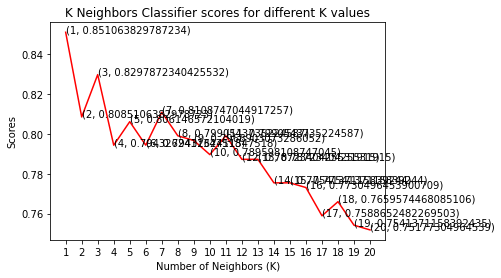

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

## 不同模型準確率比較

In [ ]:
clf_acc=clf.score(x_test,y_test)
lm_acc=lm.score(x_test,y_test)
lr_acc=lr.score(x_test,y_test)
k_acc=kmeansModel.score(x_test,y_test)
rf_acc=randomForestModel.score(x_test,y_test)
knn_acc=knnModel.score(x_test,y_test)

In [ ]:
pd.DataFrame([clf_acc,lm_acc,lr_acc,rf_acc,knn_acc],index=['SVC', 'LinearRegression', 'Logistic','Random forest','KNN'])

,0
SVC,0.947991
LinearRegression,0.290494
Logistic,0.891253
Random forest,0.993736
KNN,0.829787


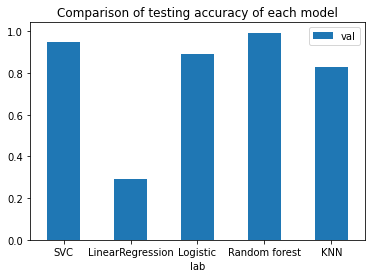

In [ ]:
acc = pd.DataFrame({'lab':['SVC', 'LinearRegression', 'Logistic','Random forest','KNN'], 'val':[clf_acc,lm_acc,lr_acc,rf_acc,knn_acc]})
ax = acc.plot.bar(x='lab', y='val', rot=0)
plt.title('Comparison of testing accuracy of each model')
ax

# Reference
*   [使用Panda進行數據處理](https://yanwei-liu.medium.com/python-pandas%E4%BD%BF%E7%94%A8%E7%AD%86%E8%A8%98-a4682e254d90)

+ [Heart-Disease-Prediction](https://github.com/kb22/Heart-Disease-Prediction/blob/master/Heart%20Disease%20Prediction.ipynb)

